In [46]:
import pandas as pd
import matplotlib.pyplot as plt

In [21]:
df = pd.read_csv('fire/data/fires_spain_since_2010.csv',
                 usecols=['lat', 'lon', 'fire_val', 'date'],
                 parse_dates=['date'])

In [22]:
df.dtypes

lat                float64
lon                float64
fire_val           float64
date        datetime64[ns]
dtype: object

In [32]:
# df['date'].groupby([df.date.year, df.date.month]).agg('count')
# df['week/year'] = df['date'].apply(lambda x: "%d/%d" % (x.week, x.year))
df['week'] = df['date'].apply(lambda x: x.week)
df['year'] = df['date'].apply(lambda x: x.year)

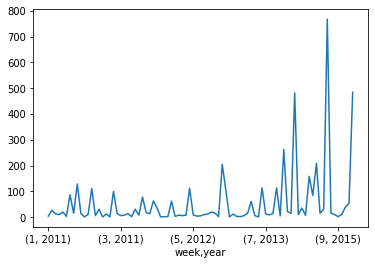

In [53]:
# df['year'] = df['date'].apply(lambda x: x.year)
df_agg = df[df['week'] < 10].groupby(['week', 'year'])['lat'].agg('count')
# df_p = df_agg.pivot(index='week', columns='year', values='count')
df_agg.plot()

In [58]:
df_agg.dtypes

dtype('int64')

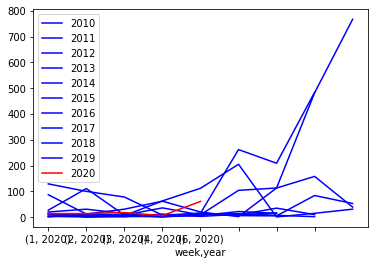

In [65]:
fig, ax = plt.subplots()
colors = {
    2009: 'b',
    2010: 'b',
    2011: 'b',
    2012: 'b',
    2013: 'b',
    2014: 'b',
    2015: 'b',
    2016: 'b',
    2017: 'b',
    2018: 'b',
    2019: 'b',
    2020: 'r',
}

# TODO: Split in "historic average till 2019 VS "current year 2020"
for key, grp in df_agg.groupby(['year']):
    ax = grp.plot(ax=ax, kind='line', x='x', y='y', c=colors[key], label=key)
    
# # Current year
# for key, grp in df_agg[2020:].groupby(['year']):
#     ax = grp.plot(ax=ax, kind='line', x='x', y='y', c=colors[key], label=key)

plt.legend(loc='best')
plt.show()

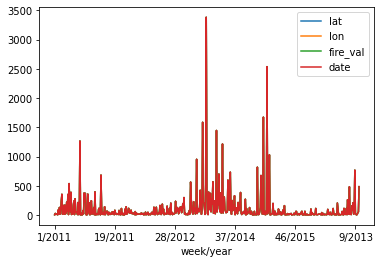

In [26]:
df.groupby('week/year').agg('count').plot()